In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
## Feature Engineering

In [9]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
## Concate variable with dataframe

In [11]:
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
## Spliting the dataset into training set and test test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
## Feature scalling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[-0.73550706,  0.01526571,  0.00886037, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [ 1.02442719, -0.65260917,  0.00886037, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.80829492, -0.46178778,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ..., -0.56811207,
        -0.57468161,  0.91974271],
       [-0.62229491, -0.08014499,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       [-0.28265848,  0.87396199, -1.37557264, ...,  1.76021608,
        -0.57468161, -1.08726059]])

In [21]:
X_test

array([[-0.55025082, -0.36637708,  1.04718513, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [-1.31185979,  0.11067641, -1.02946438, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.57157862,  0.3014978 ,  1.04718513, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 1.95070838,  0.01526571, -1.37557264, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.29369426, -0.08014499,  0.70107688, ...,  1.76021608,
        -0.57468161,  0.91974271],
       [ 0.870047  , -0.74801987, -0.68335613, ..., -0.56811207,
        -0.57468161,  0.91974271]])

In [22]:
X_train.shape

(7500, 11)

In [23]:
## Create ANN

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [25]:
## initi

In [26]:
classifier = Sequential()

In [27]:
## Adding the input layer

In [28]:
classifier.add(Dense(units=11,activation ='relu'))

In [29]:
classifier.add(Dense(units=7,activation = 'relu'))

In [30]:
classifier.add(Dense(units=6,activation = 'relu'))

In [31]:
## adding the output layer

In [32]:
classifier.add(Dense(1,activation = 'sigmoid'))

In [33]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=500)

Epoch 1/500
503/503 [==============================] - 2s 3ms/step - loss: 0.5815 - accuracy: 0.7590 - val_loss: 0.4623 - val_accuracy: 0.8065
Epoch 2/500
503/503 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.8145 - val_loss: 0.4197 - val_accuracy: 0.8199
Epoch 3/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3940 - accuracy: 0.8348 - val_loss: 0.3974 - val_accuracy: 0.8292
Epoch 4/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8473 - val_loss: 0.3924 - val_accuracy: 0.8328
Epoch 5/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8533 - val_loss: 0.3816 - val_accuracy: 0.8393
Epoch 6/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8511 - val_loss: 0.3795 - val_accuracy: 0.8413
Epoch 7/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3510 - accuracy: 0.8523 - val_loss: 0.3758 - val_accuracy: 0.8417

Epoch 58/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3202 - accuracy: 0.8722 - val_loss: 0.3691 - val_accuracy: 0.8494
Epoch 59/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8700 - val_loss: 0.3688 - val_accuracy: 0.8481
Epoch 60/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.8710 - val_loss: 0.3696 - val_accuracy: 0.8465
Epoch 61/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8722 - val_loss: 0.3805 - val_accuracy: 0.8389
Epoch 62/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8682 - val_loss: 0.3711 - val_accuracy: 0.8453
Epoch 63/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8696 - val_loss: 0.3708 - val_accuracy: 0.8457
Epoch 64/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3178 - accuracy: 0.8700 - val_loss: 0.3729 - val_accuracy:

Epoch 115/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.8742 - val_loss: 0.3794 - val_accuracy: 0.8473
Epoch 116/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3101 - accuracy: 0.8718 - val_loss: 0.3808 - val_accuracy: 0.8465
Epoch 117/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.8706 - val_loss: 0.3839 - val_accuracy: 0.8473
Epoch 118/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3095 - accuracy: 0.8726 - val_loss: 0.3793 - val_accuracy: 0.8457
Epoch 119/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3094 - accuracy: 0.8718 - val_loss: 0.3838 - val_accuracy: 0.8461
Epoch 120/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8712 - val_loss: 0.3819 - val_accuracy: 0.8437
Epoch 121/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3100 - accuracy: 0.8710 - val_loss: 0.3827 - val_ac

503/503 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.8752 - val_loss: 0.3934 - val_accuracy: 0.8481
Epoch 172/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3063 - accuracy: 0.8716 - val_loss: 0.3916 - val_accuracy: 0.8441
Epoch 173/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.8764 - val_loss: 0.3851 - val_accuracy: 0.8506
Epoch 174/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3065 - accuracy: 0.8738 - val_loss: 0.3887 - val_accuracy: 0.8457
Epoch 175/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8732 - val_loss: 0.3859 - val_accuracy: 0.8514
Epoch 176/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3060 - accuracy: 0.8698 - val_loss: 0.3858 - val_accuracy: 0.8510
Epoch 177/500
503/503 [==============================] - 1s 3ms/step - loss: 0.3051 - accuracy: 0.8740 - val_loss: 0.3918 - val_accuracy: 0.8461

503/503 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.8732 - val_loss: 0.3949 - val_accuracy: 0.8465
Epoch 228/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8770 - val_loss: 0.3924 - val_accuracy: 0.8485
Epoch 229/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3012 - accuracy: 0.8742 - val_loss: 0.3982 - val_accuracy: 0.8465
Epoch 230/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3025 - accuracy: 0.8738 - val_loss: 0.3891 - val_accuracy: 0.8522
Epoch 231/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.8754 - val_loss: 0.3948 - val_accuracy: 0.8489
Epoch 232/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.8740 - val_loss: 0.3977 - val_accuracy: 0.8469
Epoch 233/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8758 - val_loss: 0.3932 - val_accuracy: 0.8485

503/503 [==============================] - 1s 2ms/step - loss: 0.2990 - accuracy: 0.8758 - val_loss: 0.3974 - val_accuracy: 0.8502
Epoch 284/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8770 - val_loss: 0.3995 - val_accuracy: 0.8498
Epoch 285/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8768 - val_loss: 0.4016 - val_accuracy: 0.8465
Epoch 286/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.8758 - val_loss: 0.4024 - val_accuracy: 0.8473
Epoch 287/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3000 - accuracy: 0.8754 - val_loss: 0.4038 - val_accuracy: 0.8461
Epoch 288/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8774 - val_loss: 0.4082 - val_accuracy: 0.8526
Epoch 289/500
503/503 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8762 - val_loss: 0.4112 - val_accuracy: 0.8453

503/503 [==============================] - 1s 3ms/step - loss: 0.2969 - accuracy: 0.8780 - val_loss: 0.4132 - val_accuracy: 0.8453
Epoch 340/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8768 - val_loss: 0.4117 - val_accuracy: 0.8530
Epoch 341/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2970 - accuracy: 0.8756 - val_loss: 0.4157 - val_accuracy: 0.8469
Epoch 342/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2987 - accuracy: 0.8748 - val_loss: 0.4123 - val_accuracy: 0.8477
Epoch 343/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.8782 - val_loss: 0.4191 - val_accuracy: 0.8473
Epoch 344/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.8766 - val_loss: 0.4203 - val_accuracy: 0.8441
Epoch 345/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.8768 - val_loss: 0.4125 - val_accuracy: 0.8489

503/503 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8774 - val_loss: 0.4235 - val_accuracy: 0.8465
Epoch 396/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.8776 - val_loss: 0.4207 - val_accuracy: 0.8449
Epoch 397/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.8764 - val_loss: 0.4182 - val_accuracy: 0.8449
Epoch 398/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8762 - val_loss: 0.4214 - val_accuracy: 0.8441
Epoch 399/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.8768 - val_loss: 0.4283 - val_accuracy: 0.8461
Epoch 400/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2949 - accuracy: 0.8772 - val_loss: 0.4144 - val_accuracy: 0.8465
Epoch 401/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2955 - accuracy: 0.8752 - val_loss: 0.4277 - val_accuracy: 0.8477

503/503 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.8794 - val_loss: 0.4285 - val_accuracy: 0.8461
Epoch 452/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2936 - accuracy: 0.8790 - val_loss: 0.4308 - val_accuracy: 0.8465
Epoch 453/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2934 - accuracy: 0.8782 - val_loss: 0.4400 - val_accuracy: 0.8409
Epoch 454/500
503/503 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.8772 - val_loss: 0.4181 - val_accuracy: 0.8445
Epoch 455/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2932 - accuracy: 0.8802 - val_loss: 0.4361 - val_accuracy: 0.8453
Epoch 456/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2939 - accuracy: 0.8776 - val_loss: 0.4306 - val_accuracy: 0.8453
Epoch 457/500
503/503 [==============================] - 1s 3ms/step - loss: 0.2933 - accuracy: 0.8776 - val_loss: 0.4247 - val_accuracy: 0.8477

In [35]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


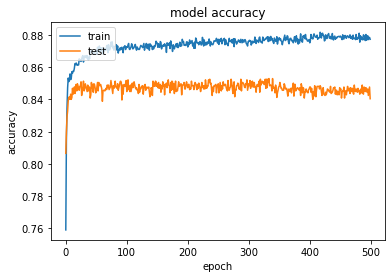

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

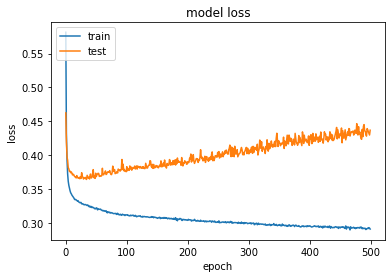

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.05)

79/79 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 988, 1003],
       [  60,  449]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.5748

In [42]:
## get the weight

In [43]:
classifier.get_weights()

[array([[ 0.30682975,  0.87091774,  0.40358755, -0.15314893, -0.03048984,
          0.43920648, -0.39630264, -0.15402895,  0.55951357, -0.25134405,
          0.8350511 ],
        [-1.3920963 ,  0.3500865 ,  1.342188  , -0.1289974 , -0.39406863,
          1.0714122 ,  0.36789396, -0.09918512,  0.60716915, -0.20228332,
         -0.3477331 ],
        [-0.1638441 , -0.14892843,  0.5591052 , -0.5110324 , -0.02628509,
         -0.74776024,  0.5018525 , -0.0476017 ,  0.12232785,  0.30128974,
          0.10519654],
        [ 0.02438577,  0.0554749 , -0.39913714, -0.16517703,  0.4570712 ,
          0.1267795 , -0.6280873 ,  0.12368543,  0.02214181, -0.8948645 ,
         -0.50061244],
        [-0.04660513, -1.0551077 , -0.0998903 , -0.8612277 ,  1.5902996 ,
          0.01346401, -0.28477523,  0.65436447,  0.6460015 , -1.6016898 ,
         -0.2264528 ],
        [-0.08312748,  0.04216373,  0.7112631 , -0.07544741, -0.06169568,
         -0.26057053,  0.24064021, -0.2477269 , -1.0182321 ,  0.0337304